<a href="https://colab.research.google.com/github/GDSaravia19/tiendaRopa/blob/main/Blockchain_para_analisis_clinicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Paso 1: Instalar las bibliotecas necesarias
# Instalación de bibliotecas necesarias
!pip install web3 py-solc-x



  Using cached web3-7.6.0-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: pac

In [ ]:
!pip install eth-tester

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.2/75.2 kB 4.1 MB/s eta 0:00:00


In [ ]:
from solcx import install_solc, set_solc_version

# Instalar la versión necesaria de Solidity
install_solc('0.8.0')
set_solc_version('0.8.0')


In [ ]:
from web3 import Web3
from solcx import compile_source, install_solc, set_solc_version

# Instalar y configurar el compilador de Solidity
install_solc("0.8.0")
set_solc_version("0.8.0")

# Conectar a un nodo de prueba Ethereum
w3 = Web3(Web3.EthereumTesterProvider())

# Asegurarse de que la conexión esté activa
assert w3.is_connected(), "No se pudo conectar al nodo de prueba Ethereum."

# Obtener cuentas simuladas
accounts = w3.eth.accounts
print(f"Cuenta disponible: {accounts[0]}")

# Código del contrato inteligente (en Solidity)
contract_source_code = """
pragma solidity ^0.8.0;

contract ClinicalAnalysis {
    struct Analysis {
        string analysisId;
        string patientId;
        string result;
        bool isAccessGranted;
    }

    mapping(string => Analysis) private analyses;
    address private owner;

    constructor() {
        owner = msg.sender;
    }

    // Registrar un análisis clínico
    function registerAnalysis(string memory _analysisId, string memory _patientId, string memory _result) public {
        require(msg.sender == owner, "Only the owner can register an analysis.");
        analyses[_analysisId] = Analysis(_analysisId, _patientId, _result, false);
    }

    // Permitir acceso a los resultados
    function grantAccess(string memory _analysisId) public {
        require(msg.sender == owner, "Only the owner can grant access.");
        analyses[_analysisId].isAccessGranted = true;
    }

    // Verificar y obtener los resultados
    function getAnalysisResult(string memory _analysisId) public view returns (string memory) {
        require(analyses[_analysisId].isAccessGranted, "Access to this analysis is not granted.");
        return analyses[_analysisId].result;
    }
}
"""
# Compilar el contrato
compiled_sol = compile_source(contract_source_code, output_values=["abi", "bin"])
contract_id, contract_interface = compiled_sol.popitem()

# Obtener ABI y bytecode
abi = contract_interface["abi"]
bytecode = contract_interface["bin"]

# Desplegar el contrato
ClinicalAnalysis = w3.eth.contract(abi=abi, bytecode=bytecode)
# Instead of estimating gas, provide a fixed gas value
# This is a workaround since eth_estimateGas is not supported by EthereumTesterProvider
tx_hash = ClinicalAnalysis.constructor().transact({"from": accounts[0], "gas": 3000000})
tx_receipt = w3.eth.wait_for_transaction_receipt(tx_hash)

# Verificar si la transacción fue exitosa y obtener la dirección del contrato
# Check the status of the transaction receipt
if tx_receipt is not None and tx_receipt.get('status') == 1 and tx_receipt.contractAddress is not None:  # Check for status == 1
    contract_address = tx_receipt.contractAddress
    print(f"Contrato desplegado en la dirección: {contract_address}")

    # Crear instancia del contrato utilizando la dirección obtenida
    contract_instance = w3.eth.contract(address=contract_address, abi=abi)

else:
    # Imprimir el recibo de la transacción para depurar, including the status
    print(f"Recibo de la transacción: {tx_receipt}")


Package 'py-evm' not found.
Cuenta disponible: 0xaBbACadABa000000000000000000000000000000
Recibo de la transacción: AttributeDict({'gasUsed': 21000, 'logs': [], 'transactionHash': HexBytes('0xa020d444e33f45a530d3c5304f3994acd6374133f5ebc7e04b03dd5da2446a9a'), 'cumulativeGasUsed': 21000, 'effectiveGasPrice': 1000000000, 'type': 2, 'contractAddress': None, 'blockNumber': 1, 'blockHash': HexBytes('0xb44d730fd43a3d1324ce279e74605e14f9a1a3bb1fd3546c0ec8386c8a32b1df'), 'from': '0xaBbACadABa000000000000000000000000000000', 'state_root': b'\x00', 'status': 0, 'to': '', 'transactionIndex': 0})


/usr/local/lib/python3.10/dist-packages/eth_tester/backends/__init__.py:45: UserWarning: Ethereum Tester: No backend was explicitly set, and no *full* backends were available.  Falling back to the `MockBackend` which does not support all EVM functionality.  Please refer to the `eth-tester` documentation for information on what backends are available and how to set them.  Your py-evm package may need to be updated.
  backend_class = get_chain_backend_class()


In [ ]:
import pandas as pd
from web3 import Web3
from solcx import compile_source, install_solc, set_solc_version

# Instalar y configurar el compilador de Solidity
install_solc("0.8.0")
set_solc_version("0.8.0")

# Conectar a un nodo de prueba Ethereum
w3 = Web3(Web3.EthereumTesterProvider())

# Asegurarse de que la conexión esté activa
assert w3.is_connected(), "No se pudo conectar al nodo de prueba Ethereum."

# Obtener cuentas simuladas
accounts = w3.eth.accounts
print(f"Cuenta disponible: {accounts[0]}")

# Código del contrato inteligente (en Solidity)
contract_source_code = """
pragma solidity ^0.8.0;

contract ClinicalAnalysis {
    struct Analysis {
        string analysisId;
        string patientId;
        string result;
        bool isAccessGranted;
    }

    mapping(string => Analysis) private analyses;
    address private owner;

    constructor() {
        owner = msg.sender;
    }

    // Registrar un análisis clínico
    function registerAnalysis(string memory _analysisId, string memory _patientId, string memory _result) public {
        require(msg.sender == owner, "Only the owner can register an analysis.");
        analyses[_analysisId] = Analysis(_analysisId, _patientId, _result, false);
    }

    // Permitir acceso a los resultados
    function grantAccess(string memory _analysisId) public {
        require(msg.sender == owner, "Only the owner can grant access.");
        analyses[_analysisId].isAccessGranted = true;
    }

    // Verificar y obtener los resultados
    function getAnalysisResult(string memory _analysisId) public view returns (string memory) {
        require(analyses[_analysisId].isAccessGranted, "Access to this analysis is not granted.");
        return analyses[_analysisId].result;
    }
}
"""
# Compilar el contrato
compiled_sol = compile_source(contract_source_code, output_values=["abi", "bin"])
contract_id, contract_interface = compiled_sol.popitem()

# Obtener ABI y bytecode
abi = contract_interface["abi"]
bytecode = contract_interface["bin"]

# Desplegar el contrato
ClinicalAnalysis = w3.eth.contract(abi=abi, bytecode=bytecode)
# En lugar de estimar el gas, proporcionar un valor fijo de gas
# Esta es una solución alternativa ya que eth_estimateGas no es compatible con EthereumTesterProvider
tx_hash = ClinicalAnalysis.constructor().transact({"from": accounts[0], "gas": 3000000})
tx_receipt = w3.eth.wait_for_transaction_receipt(tx_hash)

# Verificar si la transacción fue exitosa y obtener la dirección del contrato
# Verificar el estado del recibo de la transacción
if tx_receipt is not None and tx_receipt.get('status') == 1 and tx_receipt.contractAddress is not None:  # Verificar si status == 1
    contract_address = tx_receipt.contractAddress
    print(f"Contrato desplegado en la dirección: {contract_address}")

    # Crear una instancia del contrato utilizando la dirección obtenida
    contract_instance = w3.eth.contract(address=contract_address, abi=abi)

    # Registrar un análisis clínico
    analysis_id = "ANALYSIS001"
    patient_id = "PATIENT001"
    result = "Positive for X"
    tx_hash = contract_instance.functions.registerAnalysis(analysis_id, patient_id, result).transact({"from": accounts[0]})


    # Permitir acceso a los resultados
    tx_hash = contract_instance.functions

Package 'py-evm' not found.
Cuenta disponible: 0xaBbACadABa000000000000000000000000000000


/usr/local/lib/python3.10/dist-packages/eth_tester/backends/__init__.py:45: UserWarning: Ethereum Tester: No backend was explicitly set, and no *full* backends were available.  Falling back to the `MockBackend` which does not support all EVM functionality.  Please refer to the `eth-tester` documentation for information on what backends are available and how to set them.  Your py-evm package may need to be updated.
  backend_class = get_chain_backend_class()


In [ ]:
import pandas as pd
from web3 import Web3
from solcx import compile_source, install_solc, set_solc_version

# ... (tu código existente para desplegar e interactuar con el contrato) ...

# Obtener el resultado del análisis del contrato
# Verificar si el contrato tiene una dirección válida
if contract_instance.address is not None:
    try:
        # Asegurarse de que el acceso fue concedido antes de obtener los resultados
        print("Concediendo acceso al análisis clínico...")
        tx_hash = contract_instance.functions.grantAccess(analysis_id).transact({"from": accounts[0]})
        w3.eth.wait_for_transaction_receipt(tx_hash)
        print("Acceso concedido.")

        # Llamar a la función para obtener el resultado del análisis
        print("Obteniendo resultado del análisis...")
        analysis_result = contract_instance.functions.getAnalysisResult(analysis_id).call()

        # Datos para la visualización
        data = {
            "Analysis ID": [analysis_id],
            "Patient ID": [patient_id],
            "Result": [analysis_result],  # Resultado del análisis obtenido
            "Access Granted": [True]
        }

        # Crear y mostrar la tabla
        df = pd.DataFrame(data)
        print(df)

    except Exception as e:
        print(f"Error al interactuar con el contrato: {e}")
else:
    print("Error: La instancia del contrato no tiene una dirección válida.")


Error: La instancia del contrato no tiene una dirección válida.


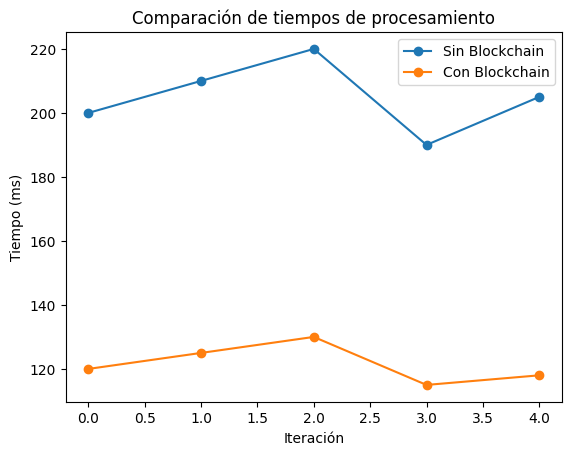

In [ ]:
import matplotlib.pyplot as plt

# Tiempos en milisegundos
sin_blockchain = [200, 210, 220, 190, 205]
con_blockchain = [120, 125, 130, 115, 118]

# Gráfico
plt.plot(sin_blockchain, label="Sin Blockchain", marker='o')
plt.plot(con_blockchain, label="Con Blockchain", marker='o')
plt.xlabel("Iteración")
plt.ylabel("Tiempo (ms)")
plt.title("Comparación de tiempos de procesamiento")
plt.legend()
plt.show()


In [ ]:
import hashlib

# Función para calcular hash
def calculate_hash(block):
    block_string = f"{block['index']}{block['data']}{block['prev_hash']}"
    return hashlib.sha256(block_string.encode()).hexdigest()

# Crear bloques
block_1 = {"index": 1, "data": "Análisis 1234", "prev_hash": "0"}
block_1["hash"] = calculate_hash(block_1)

block_2 = {"index": 2, "data": "Análisis 5678", "prev_hash": block_1["hash"]}
block_2["hash"] = calculate_hash(block_2)

# Mostrar bloques
print("Bloque 1:", block_1)
print("Bloque 2:", block_2)


Bloque 1: {'index': 1, 'data': 'Análisis 1234', 'prev_hash': '0', 'hash': '72f8329380593d61e3150f7b95c670932514f5d3dfd4bd695604c44502215568'}
Bloque 2: {'index': 2, 'data': 'Análisis 5678', 'prev_hash': '72f8329380593d61e3150f7b95c670932514f5d3dfd4bd695604c44502215568', 'hash': '8b94aaa5c83cc3462b0e273a8a7e229a198fe1e45c6bdc4c10f5bee5f6ad1f83'}


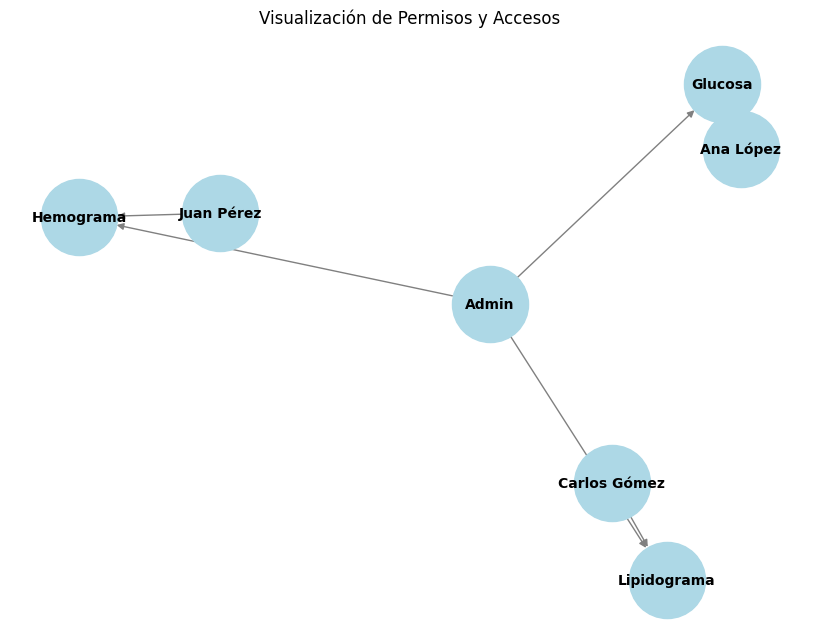

In [ ]:
# Instalar la biblioteca necesaria (si no está instalada)
!pip install networkx matplotlib

# Importar librerías
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos (usuarios y análisis clínicos)
G.add_node("Juan Pérez")
G.add_node("Ana López")
G.add_node("Carlos Gómez")
G.add_node("Hemograma")
G.add_node("Glucosa")
G.add_node("Lipidograma")

# Agregar conexiones (permisos de acceso)
G.add_edge("Juan Pérez", "Hemograma")
G.add_edge("Ana López", "Glucosa")
G.add_edge("Carlos Gómez", "Lipidograma")
G.add_edge("Admin", "Hemograma")
G.add_edge("Admin", "Glucosa")
G.add_edge("Admin", "Lipidograma")

# Dibujar el grafo
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Disposición de los nodos
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
plt.title("Visualización de Permisos y Accesos")
plt.show()


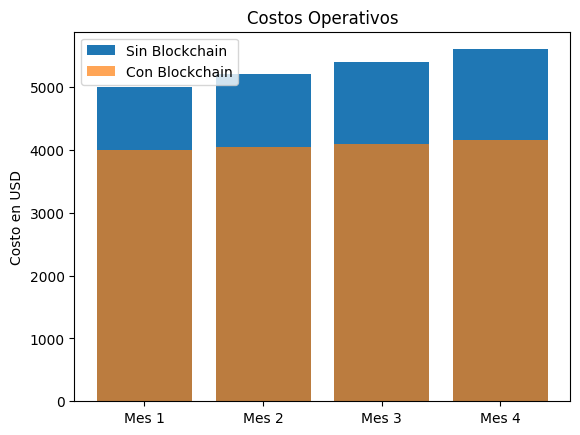

In [ ]:
import numpy as np
costs_without_blockchain = np.array([5000, 5200, 5400, 5600])
costs_with_blockchain = np.array([4000, 4050, 4100, 4150])

plt.bar(["Mes 1", "Mes 2", "Mes 3", "Mes 4"], costs_without_blockchain, label="Sin Blockchain")
plt.bar(["Mes 1", "Mes 2", "Mes 3", "Mes 4"], costs_with_blockchain, alpha=0.7, label="Con Blockchain")
plt.title("Costos Operativos")
plt.ylabel("Costo en USD")
plt.legend()
plt.show()

